# Imports

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

# Get the data

The Fashion-MNIST dataset, available at (https://github.com/zalandoresearch/fashion-mnist), comprises images sourced from Zalando, Europe's largest online fashion retailer. It encompasses a collection of 60,000 training samples and 10,000 test samples. Each sample in this dataset is represented as a 28*28 grayscale image and is labeled with one of the ten classes, each corresponding to a specific article of clothing:

| Label | Description   |
|-------|---------------|
| 0     | T-shirt/top   |
| 1     | Trouser       |
| 2     | Pullover      |
| 3     | Dress         |
| 4     | Coat          |
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |
| 8     | Bag           |
| 9     | Ankle boot    |


In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_labels)

4422102/4422102 [==============================] - 10s 2us/step
[9 0 0 ... 3 0 5]


In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

In [15]:
print(train_images.shape)

(60000, 28, 28)


In [16]:
print(test_images.shape)

(10000, 28, 28)


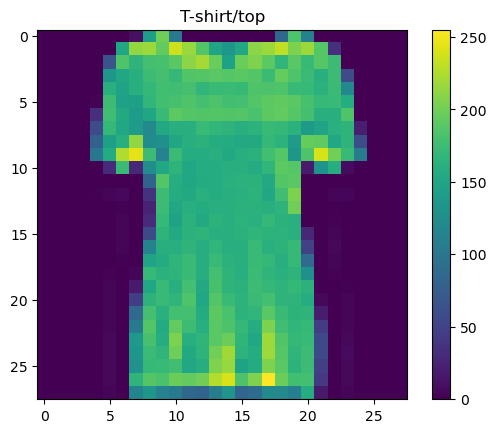

In [22]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[10]])
plt.show()

# Data preprocessing

The pixel values are in the range of 0 to 255. We need to rescale the data to a range of 0 to 1 before feeding it to the neural network:

In [23]:
train_images = train_images / 255.0
test_images = test_images / 255.0

We display the first 9 training samples after the preprocessing:

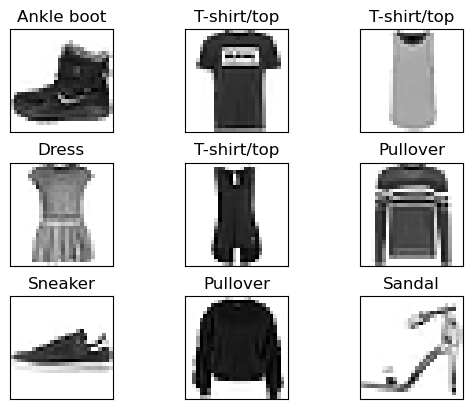

In [24]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()    

# The CNN model

The CNN model has two main components: the feature extractor composed of a set of convolutional and pooling layers, and the classifier backend similar to a regular neural network.

The convolutional layer in Keras only takes in individual samples in three dimensions. We first reshape the data into four dimensions. The first dimension is the number of samples, and the fourth dimension is the appended one representing the grayscale images:


In [25]:
X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))
print(X_train.shape)

(60000, 28, 28, 1)


In [27]:
tf.random.set_seed(42)

In [31]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3),activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),  activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [32]:
model.compile(optimizer='adam',
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)             

In [35]:
model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4877 - accuracy: 0.8196 - val_loss: 0.3525 - val_accuracy: 0.8755
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3152 - accuracy: 0.8842 - val_loss: 0.3645 - val_accuracy: 0.8687
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2672 - accuracy: 0.9025 - val_loss: 0.2877 - val_accuracy: 0.8957
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2357 - accuracy: 0.9137 - val_loss: 0.2534 - val_accuracy: 0.9108
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2115 - accuracy: 0.9220 - val_loss: 0.2538 - val_accuracy: 0.9061
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1871 - accuracy: 0.9313 - val_loss: 0.2771 - val_accuracy: 0.9004
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1691 - accuracy: 0.9366 - val_loss: 0.2544 - val_ac

In [68]:
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set:', test_acc)

313/313 - 1s - loss: 0.3333 - accuracy: 0.8963 - 768ms/epoch - 2ms/step
Accuracy on test set: 0.8963000178337097


# Predictions

In [37]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [56]:
def plot_image_prediction(i, images, predictions, labels, class_names):
    plt.subplot(1,2,1)
    plt.imshow(images[i], cmap=plt.cm.binary)
    prediction = np.argmax(predictions[i])
    color = 'blue' if prediction == labels[i] else 'red'
    plt.title(f"{class_names[labels[i]]} (predicted {class_names[prediction]})", color=color)
    plt.show()

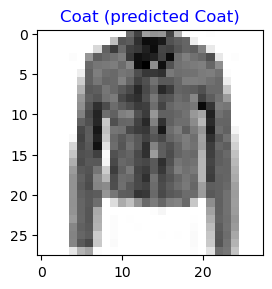

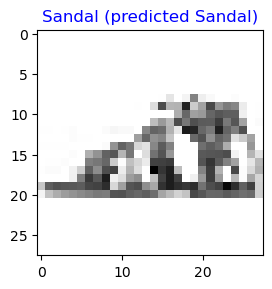

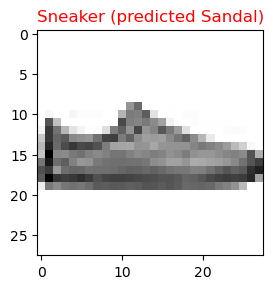

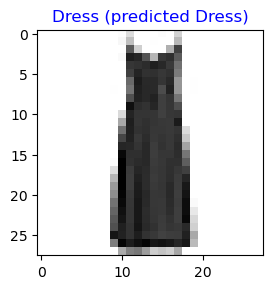

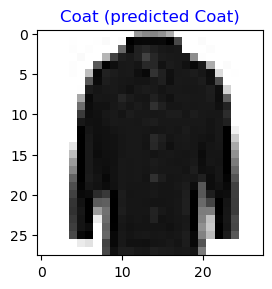

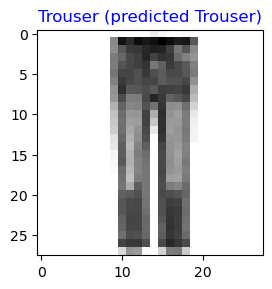

In [60]:
for i in range(10,16):
    plot_image_prediction(i, test_images, predictions, test_labels, class_names)

# Improving the classifier with data augmentation

In [62]:
datagen = ImageDataGenerator(height_shift_range=3, horizontal_flip=True)

In [63]:
model_aug = tf.keras.models.clone_model(model)

In [64]:
model_aug.compile(optimizer='adam',
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [65]:
train_generator = datagen.flow(X_train, train_labels, seed=42, batch_size=60)
model_aug.fit(train_generator, epochs=50, validation_data=(X_test, test_labels))

Epoch 1/50
1000/1000 [==============================] - 14s 13ms/step - loss: 0.6003 - accuracy: 0.7803 - val_loss: 0.4478 - val_accuracy: 0.8374
Epoch 2/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.3936 - accuracy: 0.8545 - val_loss: 0.3710 - val_accuracy: 0.8665
Epoch 3/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.3406 - accuracy: 0.8749 - val_loss: 0.3337 - val_accuracy: 0.8792
Epoch 4/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.3097 - accuracy: 0.8867 - val_loss: 0.3103 - val_accuracy: 0.8884
Epoch 5/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.2873 - accuracy: 0.8941 - val_loss: 0.2954 - val_accuracy: 0.8969
Epoch 6/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.2704 - accuracy: 0.8992 - val_loss: 0.2913 - val_accuracy: 0.8915
Epoch 7/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.2573 - accuracy: 0.9043 - val_loss: 0.2907 -

In [67]:
test_loss, test_acc = model_aug.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set:', test_acc)

313/313 - 1s - loss: 0.3247 - accuracy: 0.9146 - 779ms/epoch - 2ms/step
Accuracy on test set: 0.9146000146865845
